# 3. Data Modeling

## Implement Baselines
<hr>

To fit our baseline model we will use OLS (Ordinary Least Squares Regression). We will split our dataset into a train and test (65 / 35) and run 10 Linear Regression simulations to calculate the Train and Test Score. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
from sklearn import linear_model
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression as Lin_Reg
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pylab
import scipy.stats as stats
%matplotlib inline

In [2]:
# helper function for plotting residual plots
def plot_residual(ax1, ax2, ax3, y_pred, y_real, line_label, title):
    ax1.scatter(y_pred, 
                y_real, 
                color='blue',
                alpha=0.6,
                label=line_label)
    ax1.set_xlabel('Predicted Y') 
    ax1.set_ylabel('Real Y')
    ax1.legend(loc='best')
    ax1.set_title(title)

    ax2.scatter(y_pred,
                y_real - y_pred, 
                color='green',
                marker='x',
                alpha=0.6,
                label='Residual')
    ax2.set_xlabel('Predicted Y')
    ax2.set_ylabel('Residual')
    
    ax2.axhline(y=0, color='black', linewidth=2.0, alpha=0.7, label='y=0')

    ax2.legend(loc='best')
    ax2.set_title('Residual Plot')
    
    ax3.hist(y_real - y_pred, bins=30, color='green', alpha=0.7)
    ax3.set_title('Histogram of residual values')
    
    return ax1, ax2, ax3

In [53]:
class model:
    
    def __init__(self, model):
        self.model = model
        self.x_train = None
        self.y_train = None
        self.x_test = None
        self.y_test = None
        self.y_pred_train = None
        self.y_pred_test = None
        self.train_score = None
        self.test_score = None
        self.train_score_log = None
        self.test_score_log = None
    
    def data_split(self, x, y, test_size):
        self.x_train, self.x_test, self.y_train, self.y_test = train_test_split(x, y, test_size=test_size)
    
    def score_reg(self):
        return self.train_score, self.test_score
    
    def score_log(self):
        self.train_score_log = metrics.r2_score(np.exp(self.y_train), np.exp(self.y_pred_train))
        self.test_score_log = metrics.r2_score(np.exp(self.y_test), np.exp(self.y_pred_test))
        return self.train_score_log, self.test_score_log
    
    def data_frame_convert(self):
        df_train = pd.DataFrame({'y_pred': self.y_pred_train, 'y_real': self.y_train})
        df_test = pd.DataFrame({'y_pred_test': self.y_pred_test, 'y_real_test': self.y_test})
        return self.train_score, self.test_score, df_train, df_test

    def data_frame_convert_log(self):
        df_train = pd.DataFrame({'y_pred': np.exp(self.y_pred_train), 'y_real': np.exp(self.y_train)})
        df_test = pd.DataFrame({'y_pred_test': np.exp(self.y_pred_test), 'y_real_test': np.exp(self.y_test)})
        return self.train_score_log, self.test_score_log, df_train, df_test
    
    def fit_model(self, x, y, test_size):
        self.data_split(x, y, test_size)
        self.model = self.model.fit(self.x_train, self.y_train)
        self.train_score = self.model.score(self.x_train, self.y_train)
        self.test_score = self.model.score(self.x_test, self.y_test)
        self.y_pred_train = self.model.predict(self.x_train)
        self.y_pred_test = self.model.predict(self.x_test)
    
def model_iterations(n, x, y, model_arg, log_bool=False):
    training_scores = [None]*n
    testing_scores = [None]*n

    for i in range(n):
        new_model = model(model_arg)
        new_model.fit_model(x, y, 0.3)
        training_scores[i], testing_scores[i] = new_model.score_reg() if not log_bool else new_model.score_log()

    print 'Mean Train Score:', np.mean(training_scores)
    print 'Mean Test Score:', np.mean(testing_scores)
    return new_model

In [4]:
data = pd.read_csv('../datasets/listings_clean.csv')
data.head()

,id,host_id,accommodates,bathrooms,bedrooms,beds,minimum_nights,availability_30,number_of_reviews,host_listing_count,...,50-59,60-69,70-79,80-84,85-89,90-94,95-100,No Reviews,price,price_log
0,1069266,5867023,-0.520266,-0.331542,-0.407402,-0.493039,0.173906,0.390393,2.716107,-0.355961,...,0,0,0,0,1,0,0,0,160.0,5.075174
1,2061725,4601412,-0.520266,-0.331542,-0.407402,0.381672,0.173906,-0.965897,1.295605,0.933455,...,0,0,0,0,0,0,1,0,58.0,4.060443
2,44974,198425,-0.520266,-0.331542,-0.407402,-0.493039,2.889531,-1.205242,0.822104,-0.355961,...,0,0,0,0,0,0,1,0,185.0,5.220356
3,4701675,22590025,-0.520266,-0.331542,-0.407402,0.381672,-0.601986,1.108429,-0.493176,-0.355961,...,0,0,0,0,0,0,1,0,195.0,5.273000
4,68914,343302,1.690892,-0.331542,1.266328,1.256383,-0.214040,-0.407424,0.295992,0.073844,...,0,0,0,0,0,0,1,0,165.0,5.105945


In [5]:
# split into x and y (note that we do not include id and host_id as predictors)
x = data.iloc[:, 2:-2]
y = data.iloc[:, -2]
y_log = data.iloc[:, -1]

## Linear Regression Model

### Linear Regression with Non Transformed Response

In [62]:
Lin_Reg_Model = model_iterations(1, x, y, Lin_Reg(fit_intercept=True))

Mean Train Score: 0.317192483819
Mean Test Score: -3.38501757596e+13


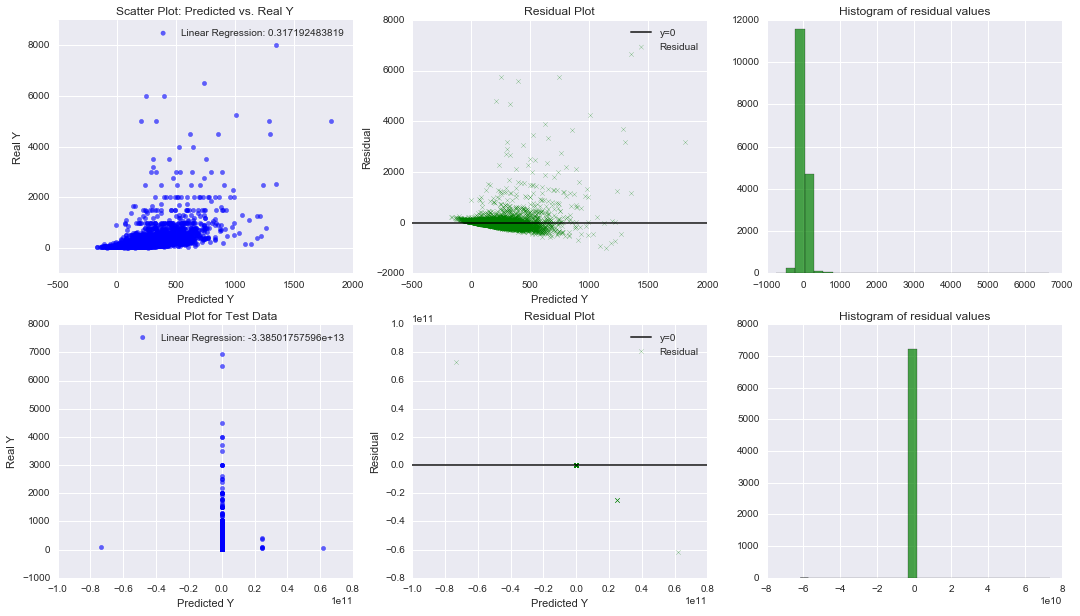

In [63]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

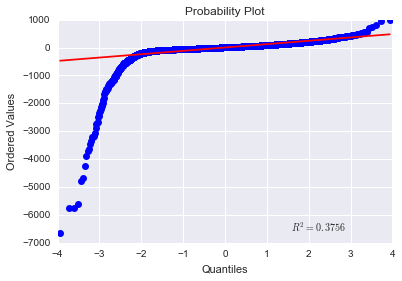

In [64]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Linear Regression with Log-Transformed Response

In [66]:
Lin_Reg_Model_Log = model_iterations(1, x, y_log, Lin_Reg(fit_intercept=True), True)

Mean Train Score: 0.358916475692
Mean Test Score: 0.206496600621


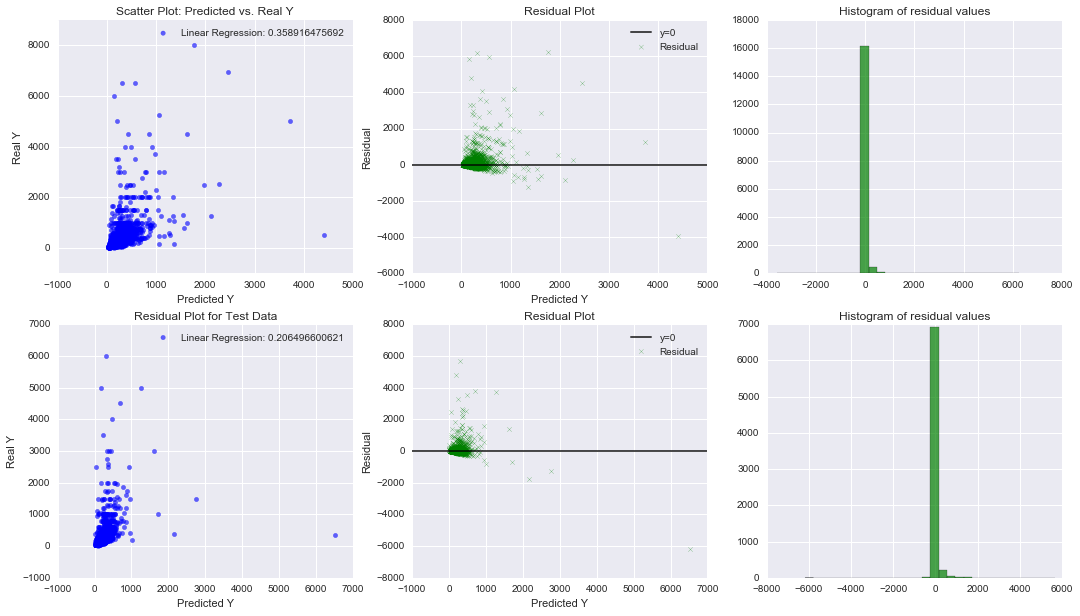

In [67]:
# plot the residuals of a linear regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

data_vals = Lin_Reg_Model_Log.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], data_vals[2]['y_pred'], data_vals[2]['y_real'], 'Linear Regression: {}'.format(data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], data_vals[3]['y_pred_test'], data_vals[3]['y_real_test'], 'Linear Regression: {}'.format(data_vals[1]), 'Residual Plot for Test Data')
plt.show()

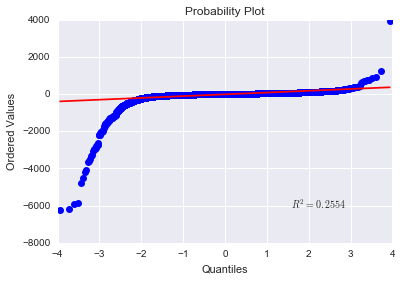

In [68]:
# qq plot for the train residuals
stats.probplot(data_vals[2]['y_pred'] - data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Linear Regression Analysis with Untransformed Response


We see that this model achieves a relatively low $R^2$ score on the train set, however, an extremely negative $R^2$ score on the test set. Based on the residual plots for the train set, we can see that a linear regression does not perform well as it predicts a negative price when the actual price is close to 0. From the residual plot itself, we see a outwards shaping cone pattern in the residuals which indicates nonlinearity in the data. Plotting a Q-Q plot of the train residuals, we see that the residuals are indeed not normally distributed ($R^2$ = 0.3756). Plotting the residuals in the test, we can see that a majority of the values were predicted to be 0 while there were many cases where the real y-value was not 0. There were also cases where the actual price was as high as 7000 when a linear regression model predicted 0. Such discrepancy in the predictions from the actual values explains why such a low negative $R^2$ was obtained.


### Linear Regression with Log-Transformed Response


We see that linear regression with a log-transformed response yields a similar $R^2$ value for the train set, though a significantly higher $R^2$ value for the test set though still lower than the train set. The train scores remain similar for both the transformed and untransformed linear regression model. The residual plot of the log-transformed linear regression model also shows a similar outwards shaping cone pattern demonstrating that a linear regression model might not be the best model to fit the data. The Q-Q plot shows that the distribution of the residuals fails normality ($R^2$ = 0.2554), achieving a score lower than that of the untransformed response.


We next fit several other linear regression models to compare against this baseline.

## Ridge & Lasso Regression

### Ridge Regression with Untransformed Response

In [32]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.309845799725
Mean Test Score: 0.326230554794


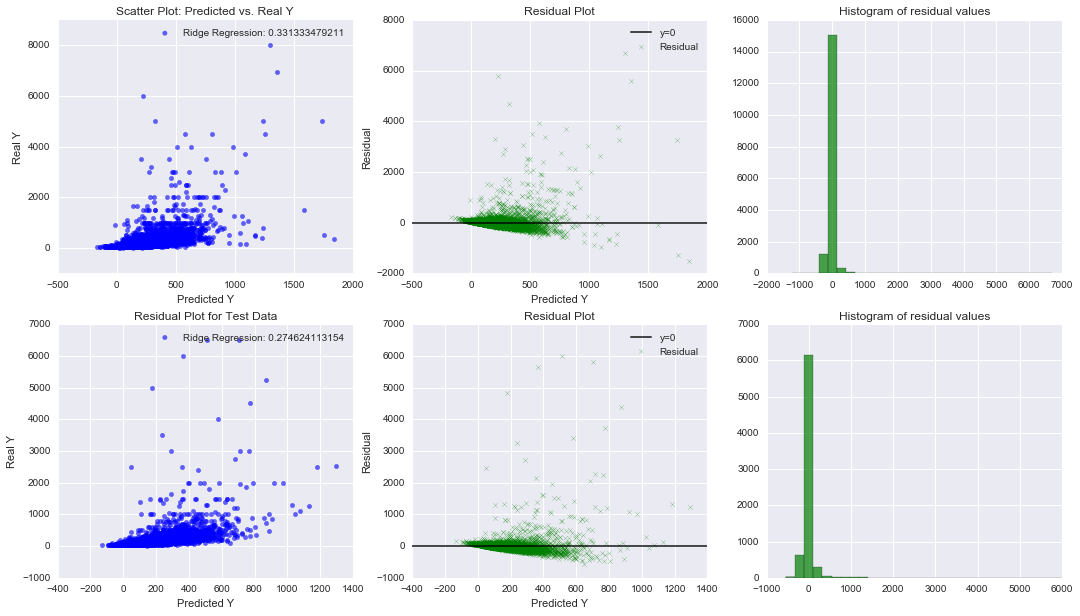

In [462]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

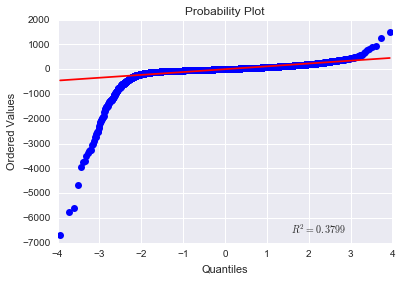

In [463]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Ridge Regression with Log-Transformed Response

In [465]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x, y_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.331307726065
Mean Test Score: 0.27538559434


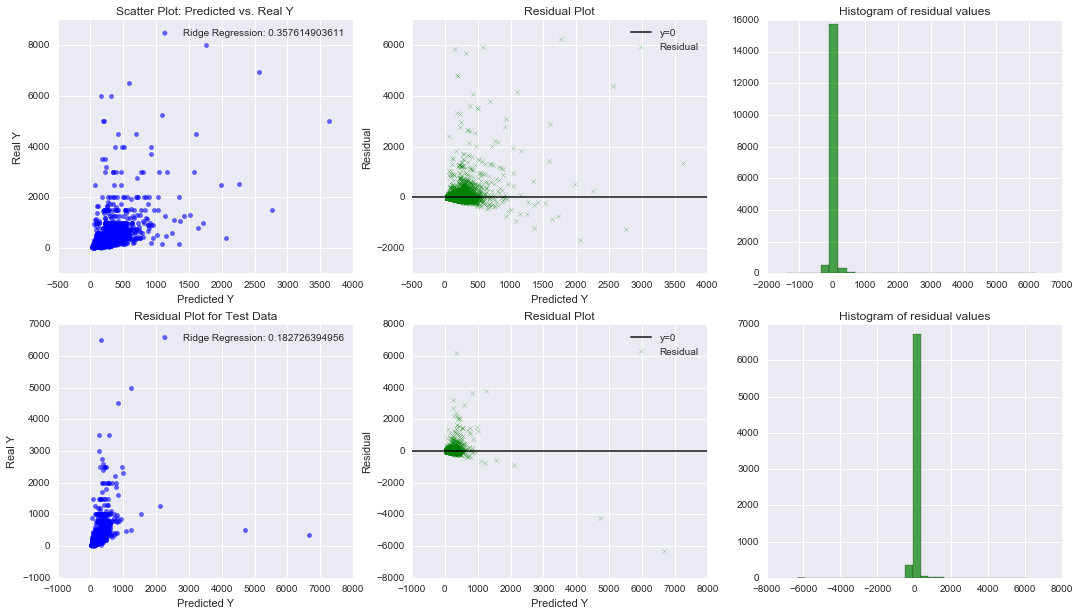

In [466]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

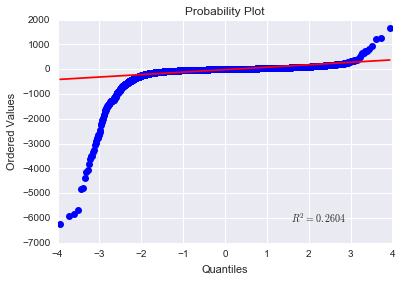

In [467]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression with Untransformed Response

In [469]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.32728664034
Mean Test Score: 0.291128052521


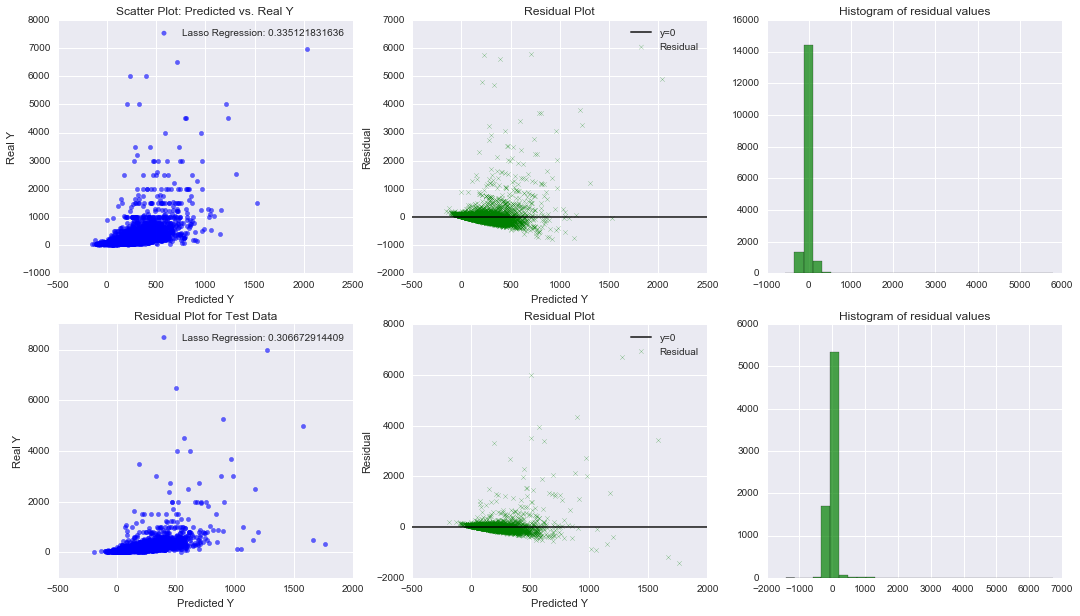

In [470]:
# plot the residuals for a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(lasso_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(lasso_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

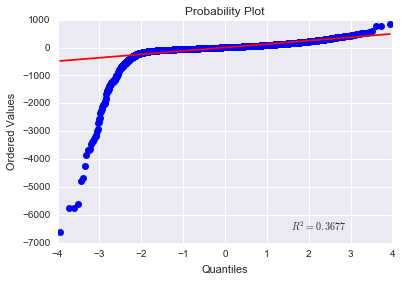

In [180]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression with Log-Transformed Response

In [471]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x, y_log, LassoCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.325286001288
Mean Test Score: 0.306986763404


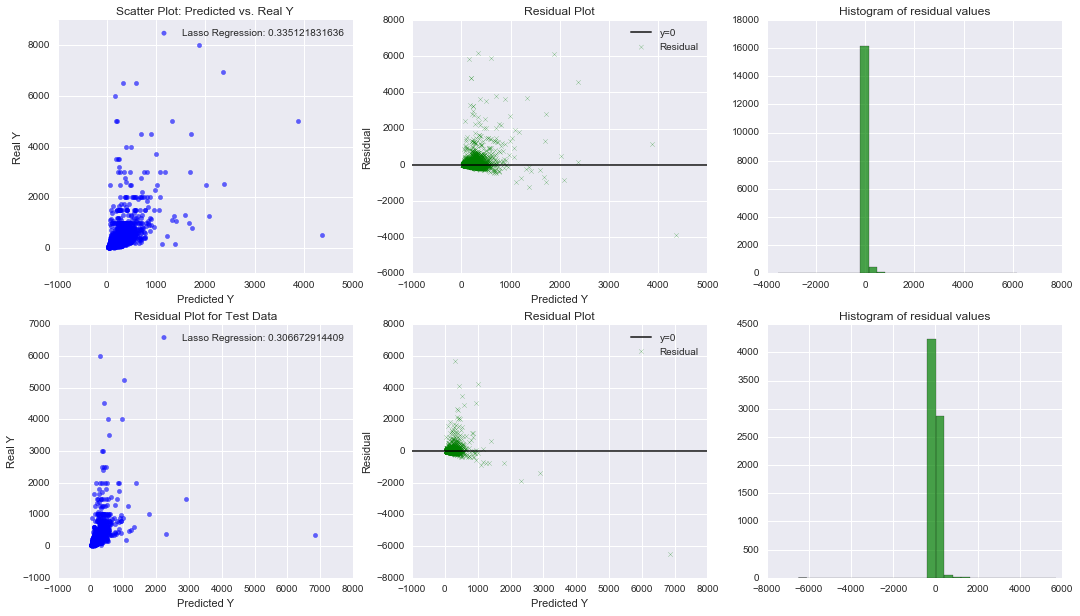

In [472]:
# plot the residuals of a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(lasso_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(lasso_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

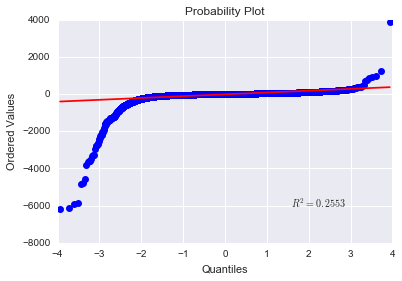

In [473]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Analysis of Ridge and Lasso Regression

We see that using Ridge Regression as well as Lasso Regression perform fairly similarly on the training and testing datasets. The $R^2$ score for Linear Regression, Ridge, and Lasso are all fairly similar. However, we see that both Ridge and Lasso perform slightly better in terms of test score. Between the untransformed and transformed response, there does not seem to be any noticeable difference in train nor test scores. The residual plots show a similar outward cone shaping trend and a low $R^2$ Q-Q plot score for both the transformed and untransformed response.

## Polynomial RidgeCV Model

In [9]:
BIC = lambda n, d, RSS: n * np.log(RSS * 1. / n) + d * np.log(n)
RSS = lambda predict, actual: np.sum((predict - actual)**2)

# Ridge Polynomial Tuning Function
def best_poly_model(pred, response, max_deg, reg_params):
    # track best params
    best_degree = None
    rss_score = None
    
    # tune reg params
    reg_params = 10.**np.linspace(-10, 5, 10)
    
    # tune for degrees
    for degree in range(1, max_deg):
        poly_t = PolynomialFeatures(degree=degree)
        pred_expanded = poly_t.fit_transform(pred)
        ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
        ridge.fit(pred_expanded, response)
        response_hat = ridge.predict(pred_expanded)        
        rss_val = RSS(response_hat, response)

        if rss_val > rss_score:
            rss_score = rss_val
            best_degree = degree
    
    return best_degree

def poly_ridge(x, y, degree, log_bool=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.90)
    poly_t = PolynomialFeatures(degree=degree)
    pred_expanded = poly_t.fit_transform(x_train)
    pred_test_expanded = poly_t.fit_transform(x_test)
    
    reg_params = 10.**np.linspace(-10, 5, 10)
    ridge = RidgeCV(alphas=reg_params, fit_intercept=True, cv=5)
    ridge.fit(pred_expanded, y_train)
    
    if not log_bool:
        train_score = ridge.score(pred_expanded, y_train)
        test_score = ridge.score(pred_test_expanded, y_test)
    if log_bool:
        train_score = metrics.r2_score(np.exp(pred_expanded), np.exp(y_train))
        test_score = metrics.r2_score(np.exp(pred_test_expanded), np.exp(y_test))
    
    return train_score, test_score

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.90)
best_degree = best_poly_model(x_train, y_train, 3, reg_params)    
print 'Best Degree:', best_degree

Best Degree: 1


In [10]:
# fit a polynomial with degree 2
scores = poly_ridge(x, y, 2)

In [11]:
print 'Train Score for Polynomial RidgeCV:', scores[0]
print 'Test Score for Polynomial RidgeCV:', scores[1]

Train Score for Polynomial RidgeCV: 0.445959889164
Test Score for Polynomial RidgeCV: 0.234101743017


### Analysis of Polynomial Ridge CV Model


A Polynomial Ridge CV model is significantly more computational intensive than the previous models we have fit, especially when tuning for correct parameters. In order for this execution block to finish in a reasonable time frame, tuning with a train split of 0.15 and test split of 0.85 was selected. A polynomial with degree 2 was also fit on a train split of 0.9 and test split of 0.1. While the train score did increase (indication of overfitting) the test score did not have any noticeable changes. However, it is important to note that due to the disproportional train and test it is hard to have any conclusive results and analysis. The CPU and time requirements of a Polynomial Ridge CV model is a considerable con. 

## Median Absolute Error


We now analyze these models by their Median Absolute Error. Intuitively, Median Absolute Error is less sensitive to outliers than Mean Squared Error and translates nicely to a dollar amount that is relative to price.

In [30]:
def median_absolute_errors(x, y, log_bool=None):
    reg_params = 10.**np.linspace(-10, 5, 10)
    models = [ linear_model.Ridge(), RidgeCV(alphas=reg_params, cv=5), linear_model.Lasso(), LassoCV(alphas=reg_params, cv=5), linear_model.ElasticNet(), linear_model.BayesianRidge(), linear_model.OrthogonalMatchingPursuit() ]
    model_labels = np.array(['Ridge', 'RidgeCV', 'Lasso', 'LassoCV', 'ElasticNet', 'BayesRidge', 'OMP'])
    model_errors = np.array([])

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.35, random_state=15)

    for model in models:
        model.fit(X_train, y_train)
        if not log_bool:
            model_err = metrics.median_absolute_error((y_test), model.predict(X_test))
            model_errors = np.append(model_errors, model_err)
        else:
            model_err = metrics.median_absolute_error(np.exp(y_test), np.exp(model.predict(X_test)))
            model_errors = np.append(model_errors, model_err)
    
    model_position = np.arange(model_errors.shape[0])
    models_sorted = np.argsort(model_errors)
    for i, model in enumerate(model_labels):
        print 'Model {} Results: {}'.format(model_labels[i], model_errors[i])

    plt.figure(figsize=(10,8))
    plt.bar(model_position, model_errors[models_sorted], align='center')
    plt.xticks(model_position, model_labels[models_sorted])
    plt.xlabel('Estimator')
    plt.ylabel('Median Absolute Error')
    plt.show()

### Median Absolute Error Untransformed Response

Model Ridge Results: 43.9929766217
Model RidgeCV Results: 41.6368474135
Model Lasso Results: 42.3221632723
Model LassoCV Results: 43.537411041
Model ElasticNet Results: 45.7331793051
Model BayesRidge Results: 43.0409373648
Model OMP Results: 44.6882596531


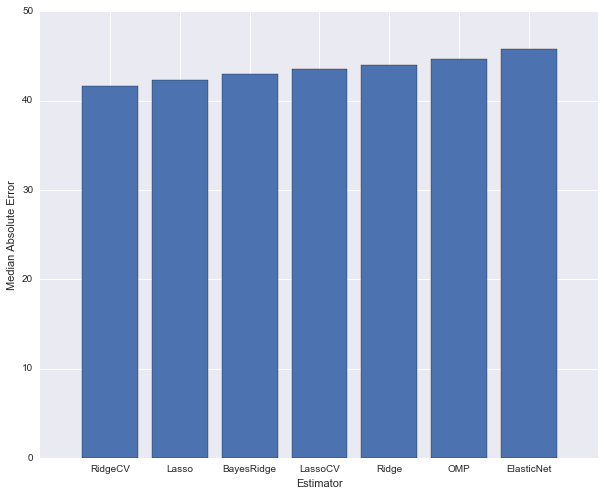

In [31]:
median_absolute_errors(x, y)

### Median Absolute Error Log-Transformed Response

Model Ridge Results: 24.6982228188
Model RidgeCV Results: 24.6982228188
Model Lasso Results: 54.3558011884
Model LassoCV Results: 24.7289108831
Model ElasticNet Results: 54.3558011884
Model BayesRidge Results: 24.7019079971
Model OMP Results: 28.709904664


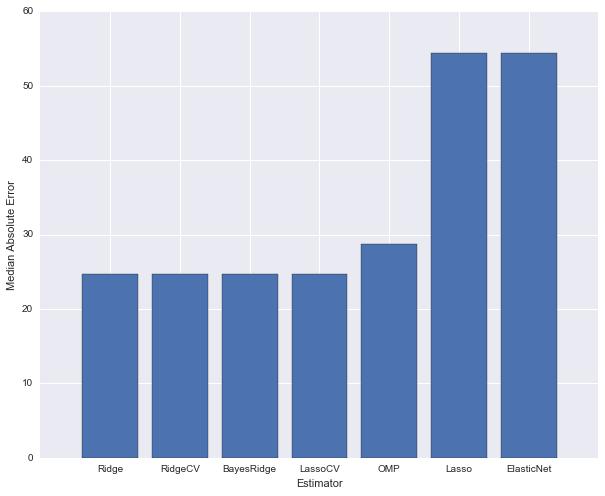

In [32]:
median_absolute_errors(x, y_log, True)

### Median Absolute Error Analysis


When analyzing these models by their Median Absolute Error, we see that a model with a log-transformed response significantly outperforms a model with an untransformed response. A Median Absolute Error of \$24.7 obtained by a Ridge regression is quite close to the optimal Median Absolute Error of \$21.43 obtained by a similar study (Amato, 2016). The con of scoring with RSS in this setting is that the loss function will be greatly affected by outliers in the data, and as a result these outliers in the dataset (and thereby outliers in predicted values) could especially detriment the $R^2$ scores of our predictors.

Analyzing by Median Absolute Error, yields the advantage of a model that is less sensitive to these outliers and is also more intuitive when comparing a score obtained relative to price. Analyzing by Median Absolute Error further helps elucidate the significant effects (beneficial in this respect) of transforming the response variable - just analyzing these models by $R^2$, this difference could not be easily discerned.

## Random Forest Regressor

We next fit an ensemble method, Random Forest Regressor, and compare its results to that of our previous models.

In [42]:
# random forest regressor
def random_forest_model(x_train, y_train, x_test, y_test):
    best_test_score = 0
    best_train_score = 0
    best_depth = 0
    # tune for tree depth from 1 to 20
    for j in range(1, 21):
        rf = RandomForestRegressor(n_estimators=50, max_depth=j, oob_score=True)
        rf.fit(x_train, y_train)
        score_train = rf.score(x_train, y_train)
        score = rf.score(x_test, y_test)
        if score > best_test_score:
            best_test_score = score
            best_train_score = score_train
            best_depth = j
    return best_train_score, best_test_score, best_depth

def random_forest_tuned(best_depth, x, y, description, log_bool=None):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
    rf = RandomForestRegressor(n_estimators=50, max_depth=best_depth, oob_score=True)
    rf.fit(x_train, y_train)
    y_pred_test = rf.predict(x_test)
    if not log_bool:
        print '{}'.format(description), metrics.median_absolute_error(y_pred_test, y_test)
    if log_bool:
        print '{}'.format(description), metrics.median_absolute_error(np.exp(y_pred_test), np.exp(y_test))

### Random Forest Regressor Untransformed Response

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)
rf_values = random_forest_model(x_train, y_train, x_test, y_test)

In [39]:
print 'Train Score with Best Test:', rf_values[0]
print 'Best Test Score:', rf_values[1]
print 'Best Depth', rf_values[2]

Train Score with Best Test: 0.601053229131
Best Test Score: 0.350188884444
Best Depth 7


In [40]:
random_forest_tuned(rf_values[2], x, y, 'Median Absolute Error for Untransformed Response:')

Median Absolute Error for Untransformed Response: 36.3372637755


### Random Forest Regressor Log-Transformed Response

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x, y_log, test_size=0.35)
rf_values = random_forest_model(x_train, y_train, x_test, y_test)

In [45]:
random_forest_tuned(rf_values[2], x, y, 'Median Absolute Error for Log-Transformed Response:')

Median Absolute Error for Log-Transformed Response: 29.9236489182


### Random Forest Regressor Analysis

We see that Random Forest Regressor yields a slightly higher train score as compared to Ridge and Lasso, which may be a result of overfitting. This overfitting is reflected on the test score, which is slightly lower than the test scores obtained by Ridge and Lasso roughly by 0.04.

## Single Listing House Data

We now try a regresion solely on single listings as this is where the majority of our listing data lies; namely listings that only had a bed of 1.

In [52]:
data_single = data[data['beds'] == min(data['beds'])]

# split into x_1 and y_1 (note that we do not include id and host_id as predictors)
x_1 = data_single.iloc[:, 2:-2]
y_1 = data_single.iloc[:, -2]
y_1_log = data_single.iloc[:, -1]


### Ridge Regression Single Listing Untransformed Response

In [55]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x_1, y_1, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.273688659366
Mean Test Score: 0.26979920748


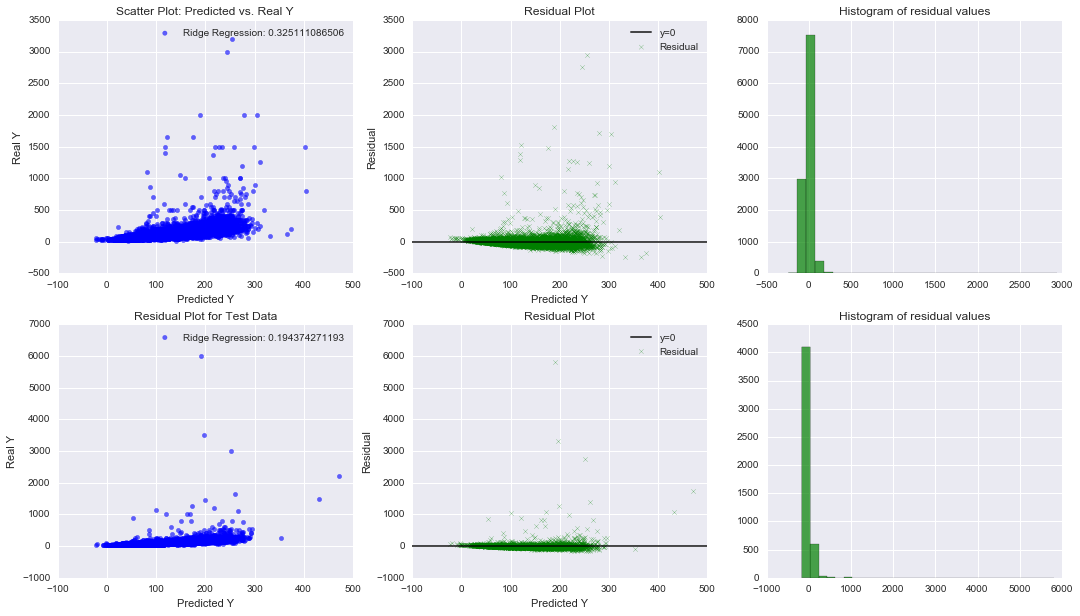

In [57]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

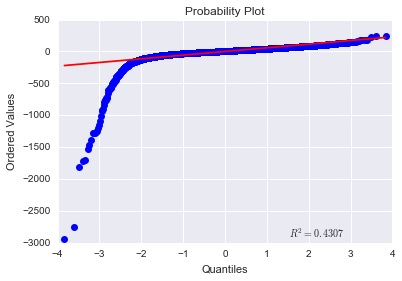

In [59]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Ridge Regression Single Listing Log-Transformed Response

In [61]:
reg_params = 10.**np.linspace(-10, 5, 10)
RidgeCV_model = model_iterations(5, x_1, y_1_log, RidgeCV(alphas=reg_params, fit_intercept=True, cv=5), True)

Mean Train Score: 0.288436413514
Mean Test Score: 0.257982991873


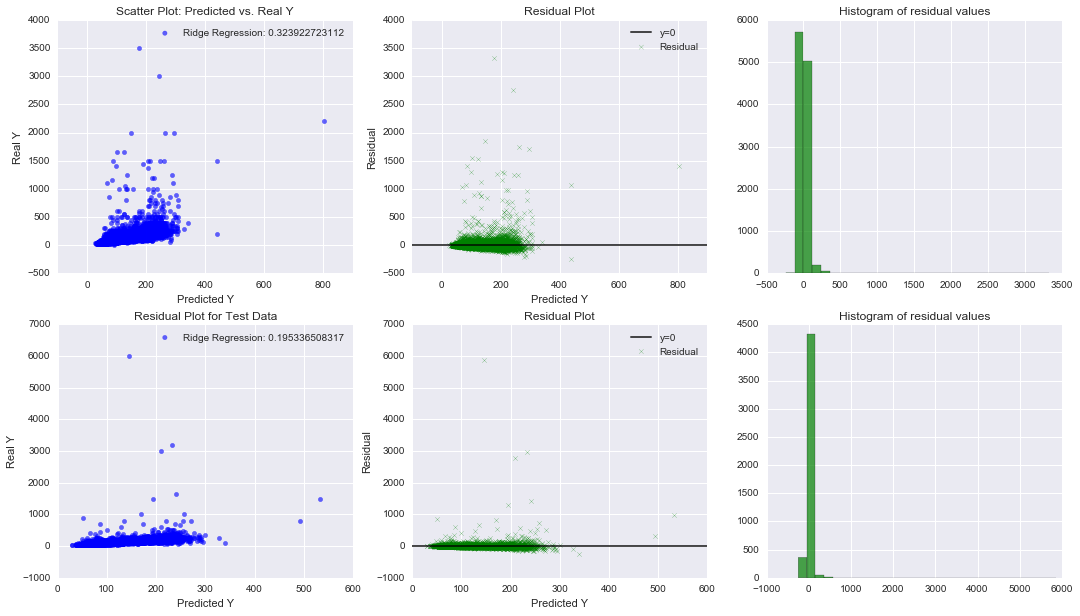

In [62]:
# plot the residuals of a ridge regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

ridge_data_vals = RidgeCV_model.data_frame_convert_log()
plot_residual(axes[0][0], axes[0][1], axes[0][2], ridge_data_vals[2]['y_pred'], ridge_data_vals[2]['y_real'], 'Ridge Regression: {}'.format(ridge_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], ridge_data_vals[3]['y_pred_test'], ridge_data_vals[3]['y_real_test'], 'Ridge Regression: {}'.format(ridge_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

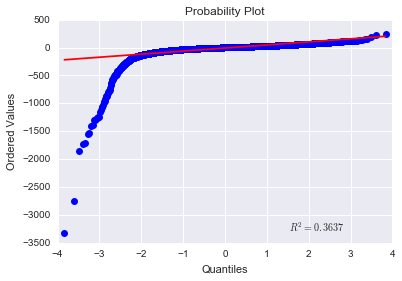

In [64]:
# qq plot for the train residuals
stats.probplot(ridge_data_vals[2]['y_pred'] - ridge_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

### Lasso Regression Single Listing Untransformed Response

In [67]:
reg_params = 10.**np.linspace(-10, 5, 10)
LassoCV_model = model_iterations(5, x_1, y_1, LassoCV(alphas=reg_params, fit_intercept=True, cv=5))

Mean Train Score: 0.284857730456
Mean Test Score: 0.240485233051


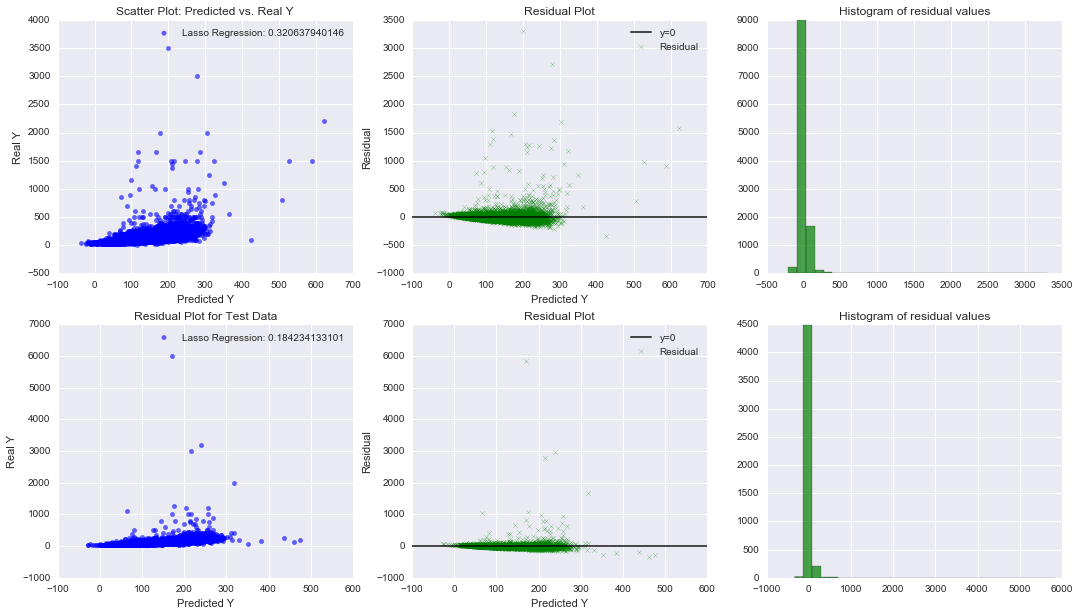

In [69]:
# plot the residuals of a lasso regression model
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

lasso_data_vals = LassoCV_model.data_frame_convert()
plot_residual(axes[0][0], axes[0][1], axes[0][2], lasso_data_vals[2]['y_pred'], lasso_data_vals[2]['y_real'], 'Lasso Regression: {}'.format(lasso_data_vals[0]), 'Scatter Plot: Predicted vs. Real Y')
plot_residual(axes[1][0], axes[1][1], axes[1][2], lasso_data_vals[3]['y_pred_test'], lasso_data_vals[3]['y_real_test'], 'Lasso Regression: {}'.format(lasso_data_vals[1]), 'Residual Plot for Test Data')
plt.show()

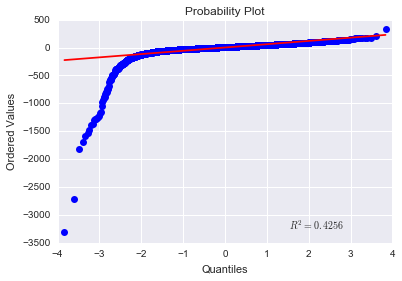

In [70]:
# qq plot for the train residuals
stats.probplot(lasso_data_vals[2]['y_pred'] - lasso_data_vals[2]['y_real'], dist="norm", plot=pylab)
pylab.show()

Model Ridge Results: 26.8684122973
Model RidgeCV Results: 26.8684122973
Model Lasso Results: 31.2060390949
Model LassoCV Results: 26.6405573476
Model ElasticNet Results: 37.3540654455
Model BayesRidge Results: 26.554801091
Model OMP Results: 29.7730232658


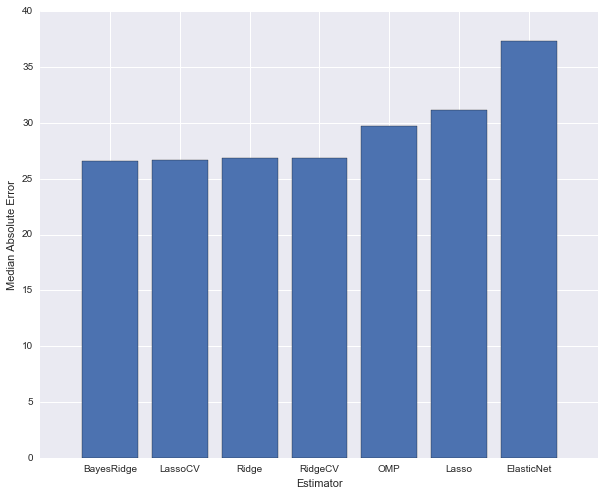

In [65]:
median_absolute_errors(x_1, y_1)

Model Ridge Results: 19.4315978056
Model RidgeCV Results: 19.4315978056
Model Lasso Results: 39.8157148169
Model LassoCV Results: 19.4881848861
Model ElasticNet Results: 39.8157148169
Model BayesRidge Results: 19.3998589577
Model OMP Results: 22.9897314946


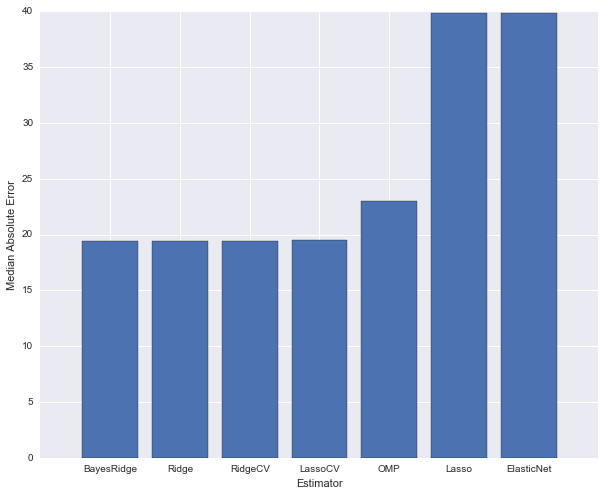

In [66]:
median_absolute_errors(x_1, y_1_log, True)

### Analysis

We see that filtering by single listings does not necessarily improve the performance of our baseline models. We see that the residual plots for just single listings are very similar to the residual plots of our previous regression models. As a sanity check: if we plot a scatter matrix, we see that there there is a similar relationship between the predictors and response for just single listings vs. all listings.